# Importing the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


# Loading the dataset

In [2]:
data = pd.read_csv('future_500_team04.csv')

In [3]:
data.head()

,Unnamed: 0,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
0,133,134,Sub-Fan,Software,2014.0,24.0,MA,Boston,"$61,78,217","4,916,737 Dollars",1261480.0,17%
1,288,289,Annoyhog,Health,2009.0,90.0,FL,Medley,"$1,27,29,198","7,494,847 Dollars",5234351.0,9%
2,443,444,Ridglingshod,Health,2011.0,23.0,CA,San Diego,"$82,93,498","8,165,133 Dollars",128365.0,9%
3,245,246,Circinuscategory,IT Services,2013.0,32.0,NJ,Cranbury,"$1,49,20,255","5,274,251 Dollars",9646004.0,28%
4,240,241,Sounderfibber,IT Services,2011.0,372.0,MN,Minnetonka,"$1,47,27,740","6,403,759 Dollars",8323981.0,21%


In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data.columns

Index(['ID', 'Name', 'Industry', 'Inception', 'Employees', 'State', 'City',
       'Revenue', 'Expenses', 'Profit', 'Growth'],
      dtype='object')

In [6]:
import missingno as msno

# Missing Values:

1. Are there any anomalies (unusual data or missing values) in the given dataset? Support your answer with appropriate argument.

In [7]:
data.isnull().any().sum()

7

In [8]:
data.duplicated().sum()

0

<AxesSubplot:>

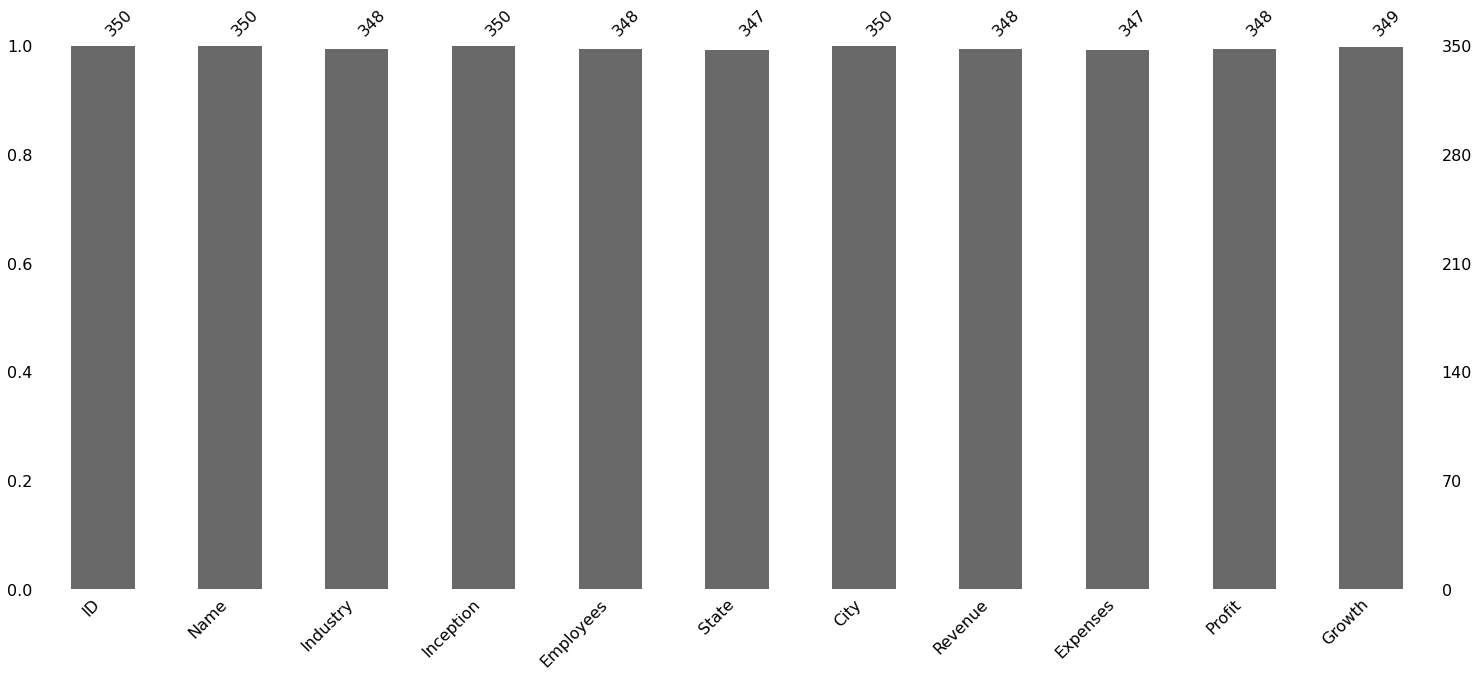

In [9]:
msno.bar(data)

There are no missing values nor duplicates in the dataset

2. List two possible strategies to handle cases with missing values in data (if applicable) & provide appropriate reasoning?

Filling missing values with the mean; We fill with the mean when the data is normally distributed. And also mean can be used when filling missing values for continuous variables.

Filling missing values with the median : We fill with median when the data is skewed.

Filling with mode ' This is for categorical data.

Dropping the missing values : we can drop if there are not many or if they do not affect our data in terms loosing valuable information.

# Data Cleaning

In [10]:
# Remove the dollar sign and commas in 'Revenue'
data['Revenue'] = data['Revenue'].replace({'\$': '', ',': ''}, regex=True)

# Remove the word 'Dollars' and commas in 'Expenses'
data['Expenses'] = data['Expenses'].replace({' Dollars': '', ',': ''}, regex=True)

# Remove commas in 'Growth'
data['Growth'] = data['Growth'].replace({'%': ''}, regex=True)

In [11]:
data['Employees'].fillna(0, inplace=True)
data['Inception'].fillna(0, inplace=True)
data['Revenue'].fillna(0, inplace=True)
data['Expenses'].fillna(0, inplace=True)
data['Growth'].fillna(0, inplace=True)

In [12]:
# Remove the dot and trailing zeros from 'Inception' and 'Employees'
data['Inception'] = data['Inception'].astype(str).str.replace(r'\.0+$', '').astype(int)
data['Employees'] = data['Employees'].astype(str).str.replace(r'\.0+$', '').astype(int)


In [13]:
data.head()

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
0,134,Sub-Fan,Software,2014,24,MA,Boston,6178217,4916737,1261480.0,17
1,289,Annoyhog,Health,2009,90,FL,Medley,12729198,7494847,5234351.0,9
2,444,Ridglingshod,Health,2011,23,CA,San Diego,8293498,8165133,128365.0,9
3,246,Circinuscategory,IT Services,2013,32,NJ,Cranbury,14920255,5274251,9646004.0,28
4,241,Sounderfibber,IT Services,2011,372,MN,Minnetonka,14727740,6403759,8323981.0,21


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         350 non-null    int64  
 1   Name       350 non-null    object 
 2   Industry   348 non-null    object 
 3   Inception  350 non-null    int32  
 4   Employees  350 non-null    int32  
 5   State      347 non-null    object 
 6   City       350 non-null    object 
 7   Revenue    350 non-null    object 
 8   Expenses   350 non-null    object 
 9   Profit     348 non-null    float64
 10  Growth     350 non-null    object 
dtypes: float64(1), int32(2), int64(1), object(7)
memory usage: 27.5+ KB


In [15]:
data['Revenue'] = data['Revenue'].astype(float)
data['Expenses'] = data['Expenses'].astype(int)
data['Growth'] = data['Growth'].astype(int)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         350 non-null    int64  
 1   Name       350 non-null    object 
 2   Industry   348 non-null    object 
 3   Inception  350 non-null    int32  
 4   Employees  350 non-null    int32  
 5   State      347 non-null    object 
 6   City       350 non-null    object 
 7   Revenue    350 non-null    float64
 8   Expenses   350 non-null    int32  
 9   Profit     348 non-null    float64
 10  Growth     350 non-null    int32  
dtypes: float64(2), int32(4), int64(1), object(4)
memory usage: 24.7+ KB


In [17]:
data.head()

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
0,134,Sub-Fan,Software,2014,24,MA,Boston,6178217.0,4916737,1261480.0,17
1,289,Annoyhog,Health,2009,90,FL,Medley,12729198.0,7494847,5234351.0,9
2,444,Ridglingshod,Health,2011,23,CA,San Diego,8293498.0,8165133,128365.0,9
3,246,Circinuscategory,IT Services,2013,32,NJ,Cranbury,14920255.0,5274251,9646004.0,28
4,241,Sounderfibber,IT Services,2011,372,MN,Minnetonka,14727740.0,6403759,8323981.0,21


In [18]:
data.describe()

,ID,Inception,Employees,Revenue,Expenses,Profit,Growth
count,350.000000,350.000000,350.000000,3.500000e+02,3.500000e+02,3.480000e+02,350.000000
mean,248.762857,2010.331429,147.082857,1.079311e+07,4.192546e+06,6.632466e+06,14.282857
std,143.577314,3.051400,432.281721,3.284496e+06,2.109258e+06,3.809704e+06,6.798996
min,2.000000,1999.000000,0.000000,0.000000e+00,0.000000e+00,1.243400e+04,-3.000000
25%,123.250000,2009.000000,26.000000,8.697276e+06,2.662454e+06,3.672650e+06,8.000000
50%,250.500000,2011.000000,55.000000,1.067974e+07,4.192102e+06,6.586320e+06,15.000000
75%,368.750000,2012.000000,124.000000,1.300962e+07,5.667252e+06,9.382582e+06,20.000000
max,500.000000,2014.000000,7125.000000,2.181005e+07,9.860686e+06,1.962453e+07,30.000000


In [19]:
data.isnull().sum()

ID           0
Name         0
Industry     2
Inception    0
Employees    0
State        3
City         0
Revenue      0
Expenses     0
Profit       2
Growth       0
dtype: int64

In [20]:
# Slice to see rows with missing values in 'Industry'
missing_industry = data[data['Industry'].isnull()]
missing_industry

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
53,15,Cityace,NaN,2010,25,CO,Louisville,9254614.0,6249498,3005116.0,6
84,14,Techline,NaN,2006,65,CA,San Ramon,13898119.0,5470303,8427816.0,23


In [21]:
# Slice to see rows with missing values in 'State'
missing_state = data[data['State'].isnull()]
missing_state

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
236,267,Circlechop,Software,2010,14,NaN,San Francisco,9067070.0,5929828,3137242.0,20
251,84,Drilldrill,Software,2010,30,NaN,San Francisco,7800620.0,2785799,5014821.0,17
301,11,Canecorporation,Health,2012,6,NaN,New York,10597009.0,7591189,3005820.0,7


In [22]:
# Slice out the rows where 'City' is 'San Francisco' or 'New York'
filtered_data = data[data['City'].isin(['San Francisco', 'New York'])]

# Display the 'State' and 'City' columns of the filtered rows
filtered_state_city = filtered_data[['State', 'City']]
filtered_state_city


,State,City
18,NY,New York
77,NY,New York
79,NY,New York
89,NY,New York
95,NY,New York
187,NY,New York
235,NY,New York
236,NaN,San Francisco
244,NY,New York
251,NaN,San Francisco


In [23]:
# Slice to see rows with missing values in 'Profit'
missing_profit = data[data['Profit'].isnull()]
missing_profit


,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
93,8,Rednimdox,Construction,2013,73,NY,Woodside,0.0,0,NaN,0
186,44,Ganzgreen,Construction,2010,224,TN,Franklin,0.0,0,NaN,9


In [24]:
# Fill NaN values in 'State' where 'City' is 'New York' with 'NY'
data.loc[(data['City'] == 'New York') & (data['State'].isnull()), 'State'] = 'NY'

In [25]:

# Check if the 'State' values have been filled correctly
new_york_rows = data[data['City'] == 'New York']
new_york_rows

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
18,325,Monotrichous,Software,2011,12,NY,New York,6203337.0,3660171,2543166.0,22
77,331,Aspic,Retail,2001,130,NY,New York,10498414.0,4645617,5852797.0,17
79,66,Zathtone,Software,2009,121,NY,New York,8953759.0,4069681,4884078.0,21
89,419,Twistedelephant,IT Services,2011,150,NY,New York,16917213.0,2814394,14102819.0,16
95,474,Valuesbilled,IT Services,2013,95,NY,New York,13214550.0,7479813,5734737.0,20
187,337,Asynchronous,Health,2013,22,NY,New York,8720504.0,2632756,6087748.0,1
235,132,Nimlux,Financial Services,2013,285,NY,New York,7753213.0,1117206,6636007.0,18
244,370,Haulbittern,IT Services,2010,138,NY,New York,15104143.0,4177864,10926279.0,24
289,215,Nervousdispatcher,Financial Services,2011,80,NY,New York,6955439.0,409237,6546202.0,16
301,11,Canecorporation,Health,2012,6,NY,New York,10597009.0,7591189,3005820.0,7


In [26]:
data.loc[(data['City'] == 'San Francisco')]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
236,267,Circlechop,Software,2010,14,NaN,San Francisco,9067070.0,5929828,3137242.0,20
251,84,Drilldrill,Software,2010,30,NaN,San Francisco,7800620.0,2785799,5014821.0,17


In [27]:
data.isnull().sum()

ID           0
Name         0
Industry     2
Inception    0
Employees    0
State        2
City         0
Revenue      0
Expenses     0
Profit       2
Growth       0
dtype: int64

In [28]:
data['State'].fillna(data['State'].mode()[0], inplace=True)

In [29]:
data['Industry'].fillna(data['Industry'].mode()[0], inplace=True)

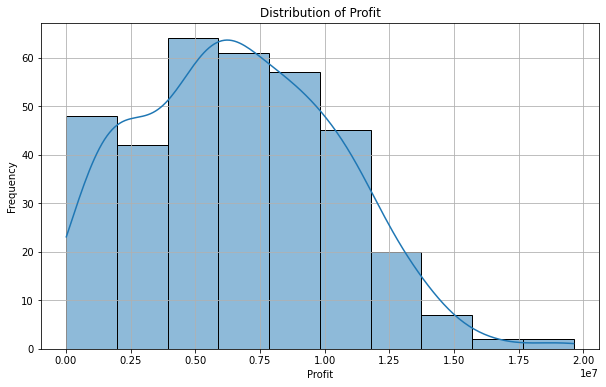

In [30]:
# Plot histogram
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(data['Profit'], bins=10, kde=True)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [31]:
data['Profit'] = data['Profit'].fillna(data['Profit'].median())

In [32]:
data.duplicated().sum()

0

In [33]:
data.isnull().sum()

ID           0
Name         0
Industry     0
Inception    0
Employees    0
State        0
City         0
Revenue      0
Expenses     0
Profit       0
Growth       0
dtype: int64

The data is now ready for analysis we have filled all the missing data.

# Exploratory data analysis

In [34]:
data.columns

Index(['ID', 'Name', 'Industry', 'Inception', 'Employees', 'State', 'City',
       'Revenue', 'Expenses', 'Profit', 'Growth'],
      dtype='object')

In [35]:
data.head()

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
0,134,Sub-Fan,Software,2014,24,MA,Boston,6178217.0,4916737,1261480.0,17
1,289,Annoyhog,Health,2009,90,FL,Medley,12729198.0,7494847,5234351.0,9
2,444,Ridglingshod,Health,2011,23,CA,San Diego,8293498.0,8165133,128365.0,9
3,246,Circinuscategory,IT Services,2013,32,NJ,Cranbury,14920255.0,5274251,9646004.0,28
4,241,Sounderfibber,IT Services,2011,372,MN,Minnetonka,14727740.0,6403759,8323981.0,21


In [36]:
data.loc[data["Profit"] == data["Profit"].max()]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
97,115,Roundla,IT Services,2012,1500,MD,Bethesda,20252673.0,628139,19624534.0,20


In [37]:
data.loc[data["Profit"] == data["Profit"].min()]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
160,373,Dillimported,Health,2002,30,TX,Humble,9724730.0,9712296,12434.0,3


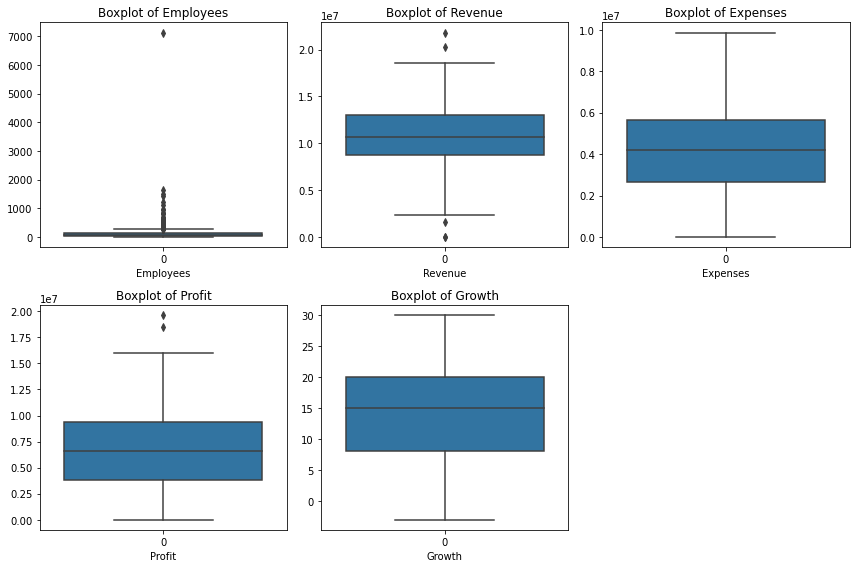

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the specified columns
selected_columns = ['Employees', 'Revenue', 'Expenses', 'Profit', 'Growth']

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create boxplots for the selected columns
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


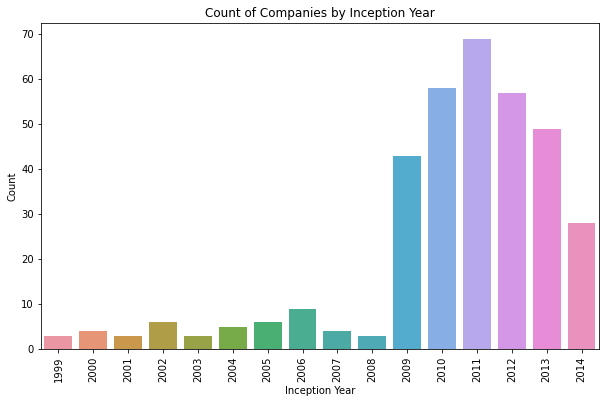

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Inception', data=data)
plt.title('Count of Companies by Inception Year')
plt.xlabel('Inception Year')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show()


Most companies were started in 2011

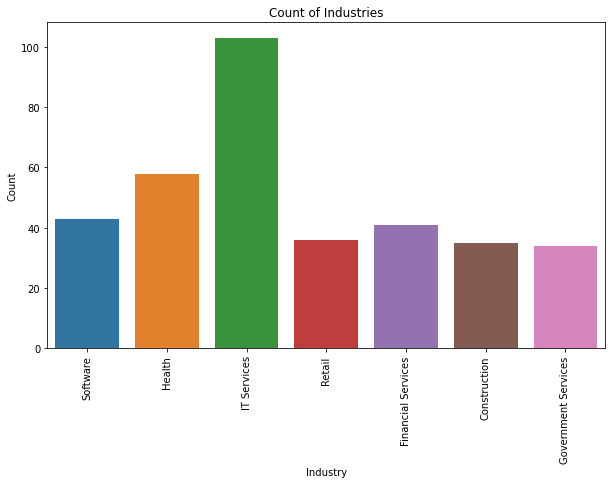

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Industry', data=data)
plt.title('Count of Industries')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


Most industries are IT services

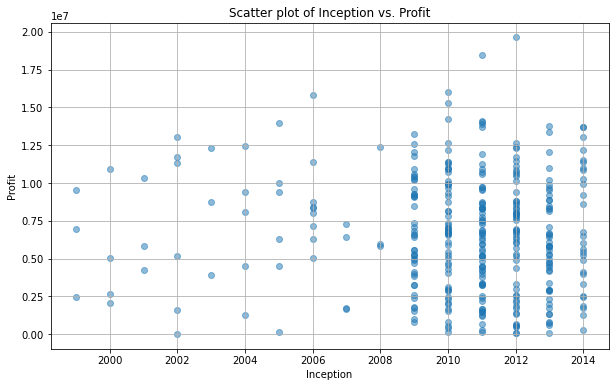

In [41]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Inception'], data['Profit'], alpha=0.5)
plt.title('Scatter plot of Inception vs. Profit')
plt.xlabel('Inception')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

2012 is the year that most profits were made.

In [42]:
data.head()

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
0,134,Sub-Fan,Software,2014,24,MA,Boston,6178217.0,4916737,1261480.0,17
1,289,Annoyhog,Health,2009,90,FL,Medley,12729198.0,7494847,5234351.0,9
2,444,Ridglingshod,Health,2011,23,CA,San Diego,8293498.0,8165133,128365.0,9
3,246,Circinuscategory,IT Services,2013,32,NJ,Cranbury,14920255.0,5274251,9646004.0,28
4,241,Sounderfibber,IT Services,2011,372,MN,Minnetonka,14727740.0,6403759,8323981.0,21


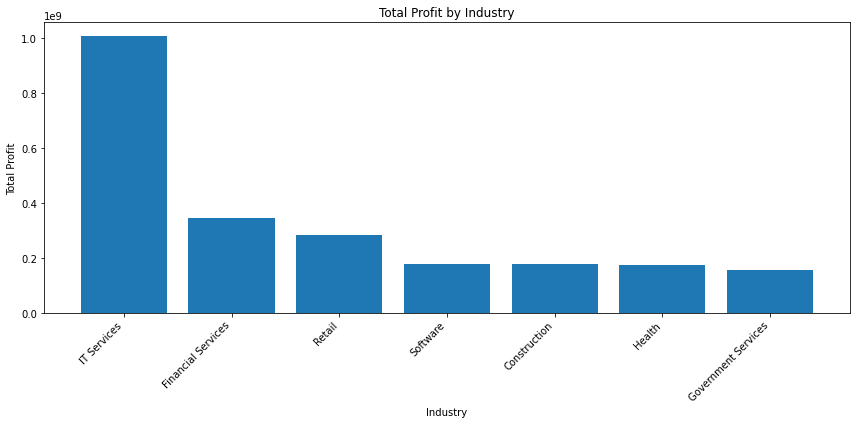

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
# Group by 'Industry' and calculate total profit for each industry
industry_profit = data.groupby('Industry')['Profit'].sum().reset_index()

# Sort by total profit in descending order
industry_profit = industry_profit.sort_values(by='Profit', ascending=False)

# Plot graph
plt.figure(figsize=(12, 6))
plt.bar(industry_profit['Industry'], industry_profit['Profit'])
plt.title('Total Profit by Industry')
plt.xlabel('Industry')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


IT services made the highest profit

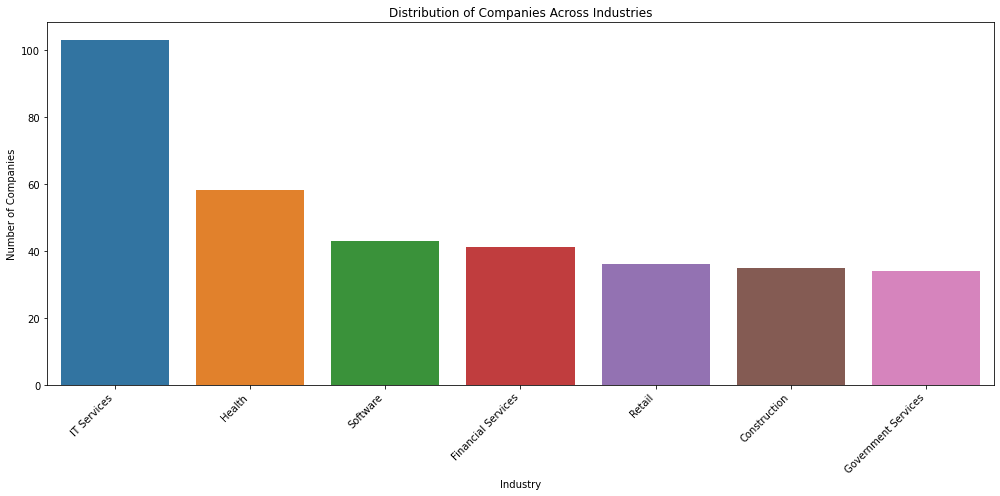

In [44]:
# Set up the figure size
plt.figure(figsize=(14, 7))

# Create a count plot to show the number of companies in each industry
sns.countplot(data=data, x='Industry', order=data['Industry'].value_counts().index)

# Add title and labels
plt.title('Distribution of Companies Across Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


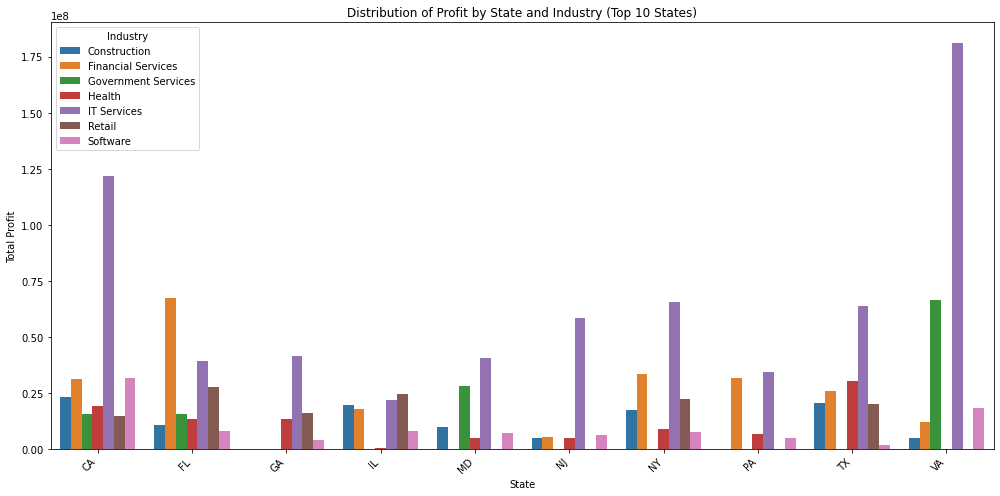

In [56]:
state_industry_profit_df = pd.DataFrame(data)

# Aggregate the total profit by state and industry
aggregated_data = state_industry_profit_df.groupby(['State', 'Industry']).sum().reset_index()

# Find the top 10 states by total profit
top_states = aggregated_data.groupby('State')['Profit'].sum().nlargest(10).index

# Filter the aggregated data to include only the top 10 states
filtered_data = aggregated_data[aggregated_data['State'].isin(top_states)]

# Set up the figure size
plt.figure(figsize=(14, 7))

# Create a bar plot to show the distribution of profit by state and industry
sns.barplot(data=filtered_data, x='State', y='Profit', hue='Industry')

# Add title and labels
plt.title('Distribution of Profit by State and Industry (Top 10 States)')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

The state with the highest profit is VA having IT services contributing to the highest profit to the state.

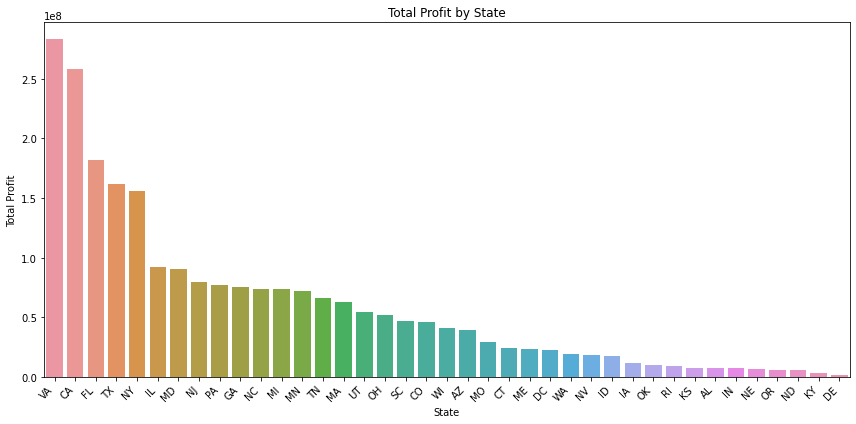

In [ ]:
# Group by 'State' to calculate total profit for each state
state_profit = data.groupby('State')['Profit'].sum().reset_index()

# Sort by total profit in descending order
state_profit = state_profit.sort_values(by='Profit', ascending=False)

# Set up the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot to show the total profit by state
sns.barplot(data=state_profit, x='State', y='Profit', ci=None)

# Add title and labels
plt.title('Total Profit by State')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

VA is the state with leading profit

In [ ]:
data.columns

Index(['ID', 'Name', 'Industry', 'Inception', 'Employees', 'State', 'City',
       'Revenue', 'Expenses', 'Profit', 'Growth'],
      dtype='object')

Comment on the correlation between the dependent and independent variable(s) used in the model? Support your answer with appropriate argument and evidence. 

Revenue shows a strong positive correlation with Profit, indicating that increasing revenue is a key driver for higher profit.

Growth has a moderate positive correlation with Profit, indicating that efforts to grow the company are beneficial for profit. Sustained growth initiatives should be prioritized.

Employees have a very weak negative correlation with Profit, suggesting that merely increasing the number of employees does not contribute significantly to profit. Focus should be on improving employee efficiency and productivity rather than just increasing headcount.

Expenses show a moderate negative correlation with Profit, emphasizing the importance of cost control. Efforts to reduce unnecessary expenses and optimize spending can positively impact profit.

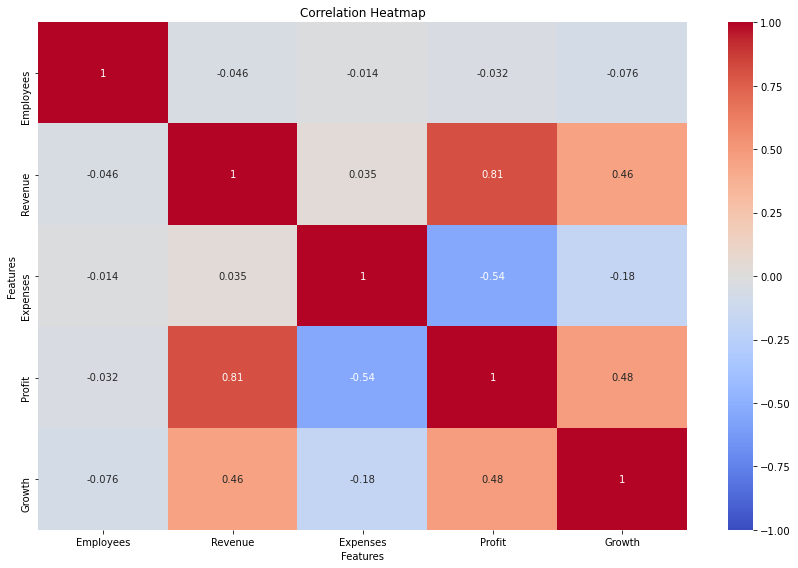

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data[['Employees', 'Revenue', 'Expenses', 'Profit', 'Growth']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Add title and labels
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.tight_layout()
plt.show()

There is a strong positive correlation (0.81) between 'Revenue' and 'Profit'. This means that as revenue increases, profit tends to increase as well. Companies with higher revenue are generally more profitable.
Focusing on increasing revenue and managing expenses appears to be key strategies for improving profitability based on these correlations.

In [47]:
data.columns

Index(['ID', 'Name', 'Industry', 'Inception', 'Employees', 'State', 'City',
       'Revenue', 'Expenses', 'Profit', 'Growth'],
      dtype='object')

In [ ]:
# Calculate the correlation of 'price' with all numerical columns and sort them in descending order
profit_corr = data.corr()['Profit'].sort_values(ascending=False)

print(profit_corr)

Profit       1.000000
Revenue      0.811224
Growth       0.480428
ID           0.044014
Employees   -0.031739
Inception   -0.045321
Expenses    -0.541951
Name: Profit, dtype: float64


# Linear Regression or apply other visualisation technique: 

1. Based on the dataset, list dependent and independent variable(s). Give reasons for your choice.

## Dependent variable

Profit

## Independent variables

Revenue

Growth

Employees

Expenses

ID

Inception

Dependent variable is the variable we want to predict. In this dataset we want to predict the profit of various companies.
Profit is influenced by the independent variables such as Revenue , Growth , Employees and EXpenses. 


2. Which variables would be the best candidates for the independent variable?

Revenue

Growth

Employees

EXpenses

In [ ]:
# Select relevant features for the model
features = ['Revenue', 'Growth', 'Employees','Expenses']
X = data[features]
y = data['Profit']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. Create a regression model based on the previous step

In [ ]:
# Create a linear regression model
model = LinearRegression()

In [ ]:
# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Rmse: {rmse}")
print(f"Mean Absolute Error: {mae}")

# Print the model coefficients
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 563741498264.0067
R-squared: 0.954751911688292
Rmse: 750827.2093258253
Mean Absolute Error: 155982.641574571
           Coefficient
Revenue       0.972394
Growth     1744.666899
Employees     0.768627
Expenses     -1.013661


Revenue appears to be the strongest feature for the independent variable, followed by Growth and Employees.

4. Based on the regression model created, make 1 or more predictions for increasing profit.

In [ ]:
coef = {'Revenue': 0.972394,'Growth': 1744.666899,'Employees': 0.768627,'Expenses': -1.013661}
values = {'Revenue': 30000000,'Growth': 30,'Employees':100,'Expenses': 500000}


In [ ]:
# Function to calculate predicted profit
def calculate_predicted_profit(values, coefficients):
    return (
        coef['Revenue'] * values['Revenue'] +
        coef['Growth'] * values['Growth'] +
        coef['Employees'] * values['Employees'] +
        coef['Expenses'] * values['Expenses']
    )

In [ ]:
predicted_profit = calculate_predicted_profit(values, coef)
predicted_profit

28717406.36967

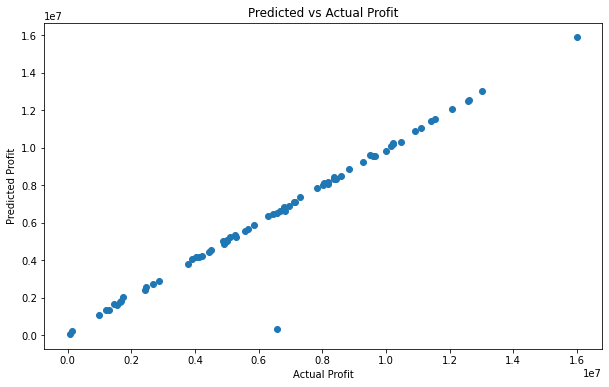

In [ ]:
# Visualize the predicted vs actual profit
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Predicted vs Actual Profit')
plt.show()

5. Based on these results, what other value added observations can you make? 

The model has an r-squared of 0.954751911688292.
The model demonstrates a strong ability to explain the variability in profit (high R-squared), indicating that the chosen features are relevant predictors. However, the error metrics (RMSE and MAE) suggest that there are still significant deviations in some predictions. Addressing these areas could further improve the model's accuracy and robustness. To further improve the rmse we can try other models.